In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sn
from datetime import datetime
import matplotlib.pyplot as plt

In [14]:
sample = pd.read_csv('G_PSQL_data/JAN_sample_no_outliers.csv')

In [18]:
early = early.groupby('branded_code_share', as_index=False)['arr_delay'].mean()

In [19]:
delayed = delayed.groupby('branded_code_share', as_index=False)['arr_delay'].mean()

In [51]:
both = both.groupby('branded_code_share', as_index=False).mean()

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

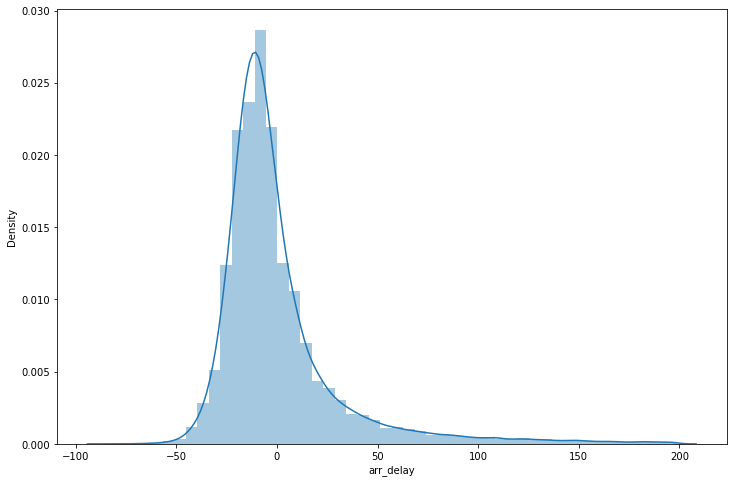

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]
sn.distplot(sample['arr_delay'])

In [94]:
blah = {code:sample[sample['branded_code_share'] == code].arr_delay for code in set(sample['branded_code_share'])}

In [99]:
st.f_oneway(blah['DL'], blah['AS'], blah['HA'], blah['WN'], blah['B6'], blah['G4'], blah['AA'], blah['UA'], blah['NK'], blah['VX'], blah['F9'])

F_onewayResult(statistic=75.84080953436685, pvalue=6.523278046273461e-156)

#### the arr time between branded code shares are not equal: good starting point for a feature maybe

In [101]:
len(set(sample['tail_num']))

5922

In [31]:
sample.nunique()

fl_date                  62
mkt_unique_carrier       11
branded_code_share       11
mkt_carrier              11
mkt_carrier_fl_num     6667
op_unique_carrier        28
tail_num               5922
op_carrier_fl_num      6669
origin_airport_id       360
origin                  360
origin_city_name        354
dest_airport_id         360
dest                    360
dest_city_name          354
crs_dep_time           1218
dep_time               1225
dep_delay               262
taxi_out                138
wheels_off             1330
wheels_on              1396
taxi_in                  94
crs_arr_time           1314
arr_time               1267
arr_delay               275
cancelled                 1
diverted                  1
crs_elapsed_time        471
actual_elapsed_time     514
air_time                498
distance               1468
dtype: int64

#### new session

In [3]:
sample = pd.read_csv('G_PSQL_data/jan_cleaned.csv')

<AxesSubplot:xlabel='dist_cats', ylabel='arr_delay'>

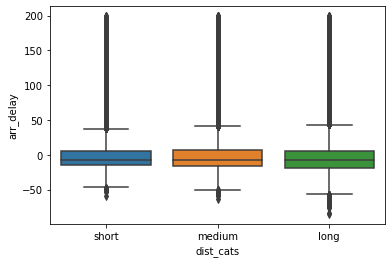

In [6]:
sn.boxplot(x=sample['dist_cats'], y=sample['arr_delay'])

In [8]:
short = sample[sample['dist_cats'] == 'short']['arr_delay']
med = sample[sample['dist_cats'] == 'medium']['arr_delay']
long = sample[sample['dist_cats'] == 'long']['arr_delay']

In [10]:
st.f_oneway(short, med, long)

F_onewayResult(statistic=105.82388462525579, pvalue=1.2190714691373319e-46)

#### mean arr delay is significantly diff between distance categorys

In [21]:
sample = sample[sample['crs_elapsed_time'] < 500]

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='crs_elapsed_time', ylabel='Density'>

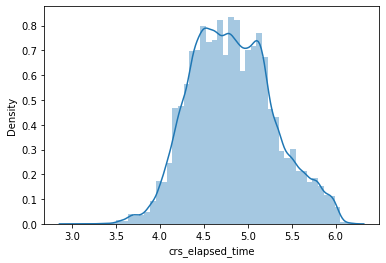

In [24]:
sn.distplot(sample['crs_elapsed_time'].apply(np.log))

<AxesSubplot:ylabel='arr_delay'>

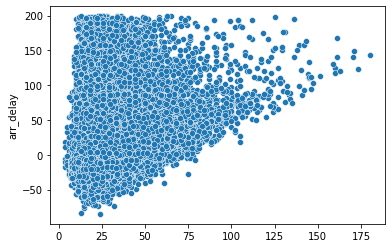

In [28]:
sn.scatterplot(x=(sample['taxi_in']+sample['taxi_out']), y=sample['arr_delay'])

In [34]:
taxiout = sample.groupby('origin_airport_id', as_index=False).agg({'taxi_out': 'mean'})

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='taxi_in', ylabel='Density'>

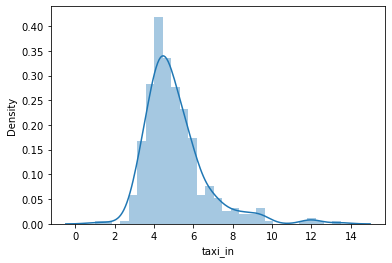

In [33]:
sn.distplot(taxiin['taxi_in'])

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='taxi_out', ylabel='Density'>

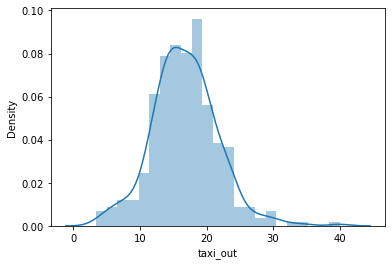

In [35]:
sn.distplot(taxiout['taxi_out'])

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
df = pd.read_csv('final_process.csv')

In [62]:
def scatter(x, y):
    return sn.scatterplot(x=df[x], y=df[y])

interact(scatter,
         x = df.columns.to_list(),
         y = df.columns.to_list())

interactive(children=(Dropdown(description='x', options=('fl_date', 'mkt_unique_carrier', 'branded_code_share'…

<function __main__.scatter(x, y)>

interactive(children=(Dropdown(description='x', options=('fl_date', 'mkt_unique_carrier', 'branded_code_share'…

<function __main__.hist(x)>

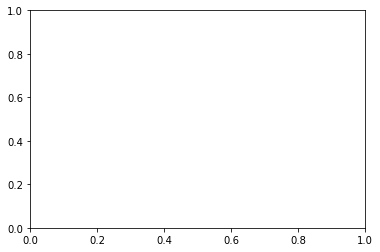

In [4]:
def hist(x):
    return sn.distplot(df[x])

interact(hist,
         x=df.columns.to_list()
        )

In [50]:
logs = df[df.dtypes[df.dtypes != 'object'].index].apply(np.log)

In [61]:
def histlog(x):
    return sn.distplot(df[x].apply(np.log))

interact(histlog,
         x=df.columns
        )

interactive(children=(Dropdown(description='x', options=('fl_date', 'mkt_unique_carrier', 'branded_code_share'…

<function __main__.histlog(x)>

<AxesSubplot:>

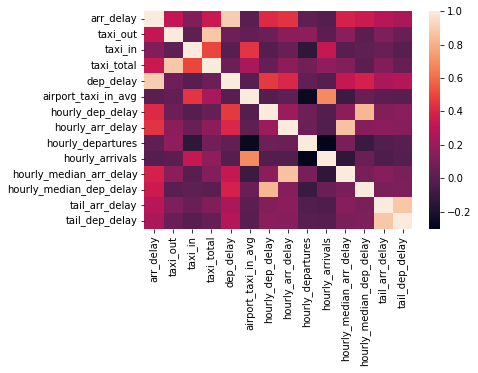

In [7]:
sn.heatmap(df[['arr_delay', 'taxi_out', 'taxi_in', 'taxi_total', 'dep_delay', 'airport_taxi_in_avg', 'hourly_dep_delay', 'hourly_arr_delay', 'hourly_departures', 'hourly_arrivals', 'hourly_median_arr_delay', 'hourly_median_dep_delay', 'tail_arr_delay', 'tail_dep_delay']].corr())

In [2]:
df = pd.read_csv('final_process.csv')

In [18]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'dist_cats', 'dep_hour', 'arr_hour', 'month_day', 'weekday',
       'hourly_arr_delay', 'hourly_dep_delay', 'tail_arr_delay',
       'tail_dep_delay', 'airport_taxi_in_avg', 'airport_taxi_out_avg',
       'taxi_total', 'tail_taxi_total'],
      dtype='object')

In [3]:
from functions import airport_hour_medians
df = airport_hour_medians(df)
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weekly_mean_arr_delay,weekly_median_dep_delay,weekly_std_dep_delay,weekly_mean_dep_delay,hourly_departures,hourly_arrivals,hourly_median_arr_delay,hourly_std_arr_delay,hourly_median_dep_delay,hourly_std_dep_delay
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,-3.394737,-3.0,24.375420,4.303502,154,57,-6.0,17.259136,-3.0,46.080947
1,2018-01-30,WN,WN,WN,893,WN,N7859B,893,12892,LAX,...,-3.394737,-3.0,24.375420,4.303502,154,61,-12.0,12.254127,-3.0,46.080947
2,2018-01-16,DL,DL,DL,4445,OO,N242SY,4445,12892,LAX,...,-0.400922,-3.0,24.375420,4.303502,154,163,-4.0,32.264377,-3.0,46.080947
3,2019-01-29,UA,UA,UA,5329,OO,N127SY,5329,12892,LAX,...,-0.400922,-3.0,24.375420,4.303502,154,163,-4.0,32.264377,-3.0,46.080947
4,2019-01-29,DL,DL,DL,2503,DL,N971AT,2503,12892,LAX,...,-0.400922,-3.0,24.375420,4.303502,154,151,-15.5,59.464139,-3.0,46.080947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108135,2018-01-17,UA,UA,UA,6390,9K,N45838,6390,14582,ROP,...,-2.750000,0.0,23.513098,0.000000,2,2,0.0,23.451949,0.0,19.017943
108136,2018-01-30,UA,UA,UA,6390,9K,N45838,6390,14582,ROP,...,-16.500000,-30.0,23.513098,-30.000000,2,2,-25.0,23.451949,-30.0,19.017943
108137,2018-01-07,UA,UA,UA,6391,9K,N14834,6391,14582,ROP,...,-5.400000,-5.0,7.071068,-5.000000,2,2,-5.0,7.071068,-5.0,7.071068
108138,2018-01-28,UA,UA,UA,6391,9K,N45838,6391,14582,ROP,...,-5.400000,-5.0,7.071068,-5.000000,2,2,-5.0,7.071068,-5.0,7.071068


In [7]:
df.isnull().sum()

fl_date               0
mkt_unique_carrier    0
branded_code_share    0
mkt_carrier           0
mkt_carrier_fl_num    0
                     ..
carrier_arr_mean      0
carrier_dep_median    0
carrier_dep_std       0
carrier_arr_median    0
carrier_arr_std       0
Length: 71, dtype: int64

In [4]:
from functions import tail_num_median
df = tail_num_median(df)

In [5]:
from functions import process_taxi_times_median
df = process_taxi_times_median(df)

In [6]:
from functions import process_carrier_id
df = process_carrier_id(df)

<AxesSubplot:>

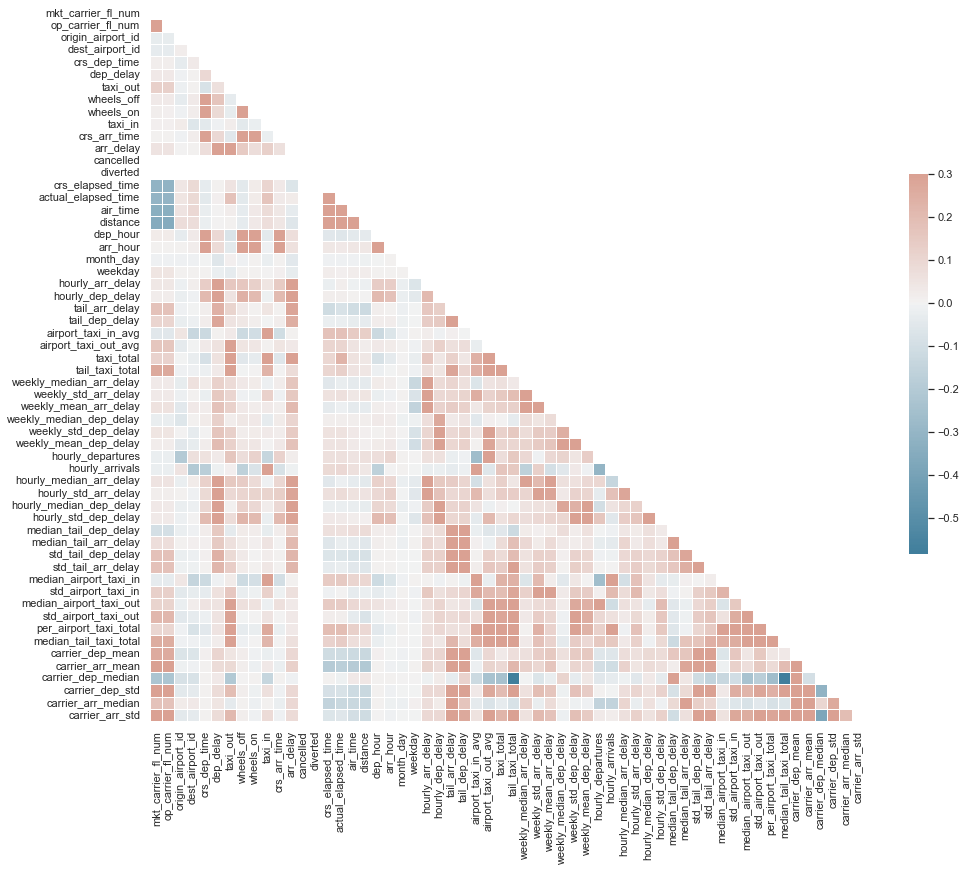

In [14]:
sn.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'dist_cats', 'dep_hour', 'arr_hour', 'month_day', 'weekday',
       'hourly_arr_delay', 'hourly_dep_delay', 'tail_arr_delay',
       'tail_dep_delay', 'airport_taxi_in_avg', 'airport_taxi_out_avg',
       'taxi_total', 'tail_taxi_total', 'weekly_median_arr_delay',
       'weekly_std_arr_delay', 'weekly_mean_arr_delay',
       'weekly_median_dep_delay', 'weekly_std_dep_delay',
       'weekly_mean_dep_delay', 'hourly_departures', 'hourly_arrivals',
       'hourly_median_arr_d

In [13]:
new = df.drop(columns=['op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name', 'dep_time','dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in','arr_time', 'arr_delay', 'cancelled', 'diverted', 'actual_elapsed_time', 'air_time', 'distance', 'month_day','fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier','mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num'])

new.to_csv('test.csv', index=False)

In [19]:
df.groupby('dep_hour', as_index=False).agg({'arr_delay': 'mean', 'fl_date': 'size'}).sort_values(by='arr_delay')

,dep_hour,arr_delay,fl_date
1,2.0,-9.705882,17
2,3.0,-6.827160,81
4,5.0,-5.807860,916
5,6.0,-5.062705,7304
6,7.0,-4.268948,6399
23,24.0,-3.669492,354
7,8.0,-2.030994,7453
8,9.0,-1.612435,5790
21,22.0,-1.605866,2966
22,23.0,-0.944681,940


In [9]:
df['dep_hour'] = df['dep_hour'].replace({0:24})